In [208]:
import numpy as np, matplotlib.pyplot as plt
import pickle

In [209]:
RESULTS = 'resultsobj'

In [210]:
resobj = pickle.load(open(RESULTS, 'rb'))

In [220]:
accuracies = resobj['acc']
models = resobj['models']

In [212]:
non_regularized = models[0]
regularized = models[1:]
acc = np.array(accuracies)

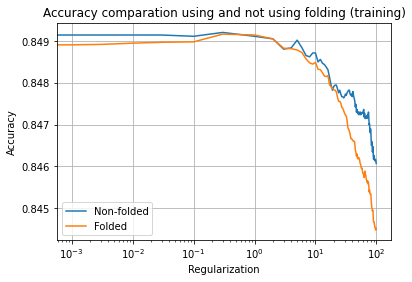

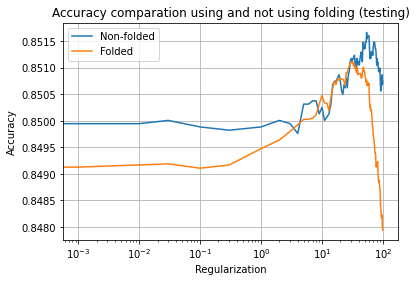

(60, 0.851667587985996)


In [233]:
training_accuracies = acc[:,0]
testing_accuracies = acc[:,1]

x = [0,0.001,0.003,0.01,0.03, 0.1,0.3,*range(1,len(acc) - 6)]
plt.plot(x,training_accuracies[:,0], label = 'Non-folded')
plt.plot(x,training_accuracies[:,1], label = 'Folded')
plt.ylabel('Accuracy')
plt.xlabel('Regularization')
plt.xscale('log')
plt.legend()
plt.title('Accuracy comparation using and not using folding (training)')
plt.grid(True)
plt.show()

plt.plot(x,testing_accuracies[:,0], label = 'Non-folded')
plt.plot(x,testing_accuracies[:,1], label = 'Folded')
plt.ylabel('Accuracy')
plt.xlabel('Regularization')
plt.xscale('log')
plt.legend()
plt.title('Accuracy comparation using and not using folding (testing)')
plt.grid(True)
plt.show()

print(list(enumerate(testing_accuracies[:,0]))[60])
#3print(list(enumerate(testing_accuracies[:,0])))

models = models[:20]
accuracies = accuracies[:20]
#x = x[:20]




IRLS iteration comparation

L2 norm of W

Accuracy comparation

Cross validation check lambda

In [221]:
#This list contains all non folded values of each regularization
mlist = list(map(lambda x: x['models'][0], models))

x = [x['regularization'] for x in models]

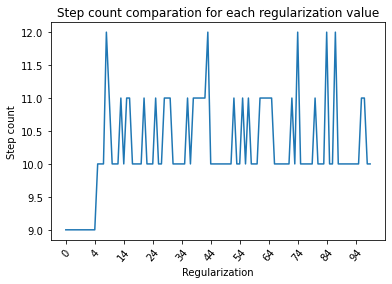

In [239]:
# IRLS iteration
# Compare for each lambda

steps = [x[1] for x in mlist]

plt.xticks(ticks=np.arange(0,len(x),10),labels=[str(m) for m in x[::10]], rotation=50)

plt.plot(np.arange(len(x)), steps)
plt.xlabel('Regularization')
plt.ylabel('Step count')
plt.title('Step count comparation for each regularization value')
plt.show()

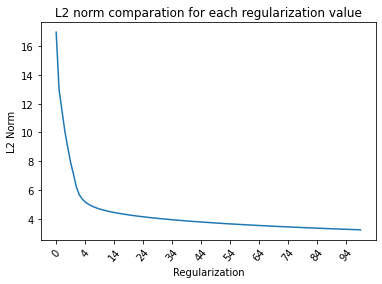

In [241]:
#L2 norm of W

norms = [np.linalg.norm(x[2]) for x in mlist]
plt.xticks(ticks=np.arange(0,len(x),10),labels=[str(m) for m in x[::10]], rotation=50)
plt.plot(np.arange(len(x)), norms)
plt.xlabel('Regularization')
plt.ylabel('L2 Norm')
plt.title('L2 norm comparation for each regularization value')
plt.show()

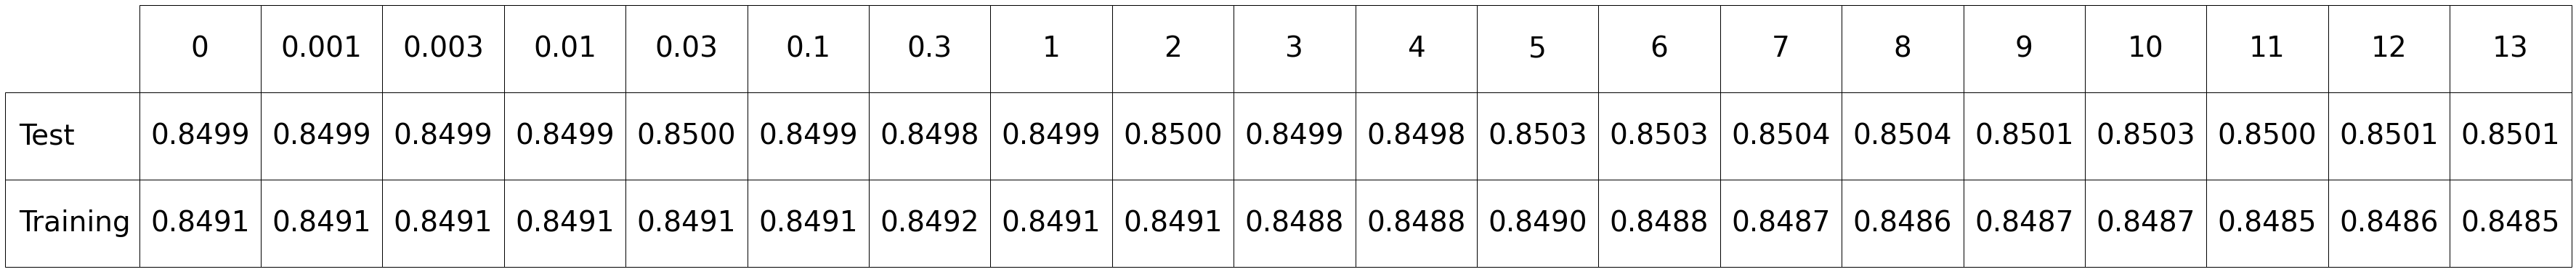

In [219]:
#Accuracy comparation between 0 regularization and more regularization
#acc ((train normal, folded), (test normal, test folded))

trainaccs = ['%.4f' % x for x in acc[:20,0][:,0]]
testaccs = ['%.4f' % x for x in acc[:20, 1][:, 0]] # test normal

fig, axs = plt.subplots()
axs.axis('tight')
axs.axis('off')
table = plt.table(cellText=[testaccs, trainaccs], colLabels=x, cellLoc='center',loc='center', rowLabels=('Test', 'Training'))
table.set_fontsize(50)
table.scale(10, 10)  # may help
plt.show()